In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(37) # 使得每次运行得到的随机数都一样

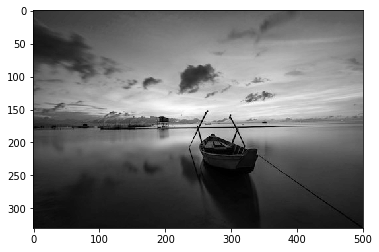

In [6]:
# 获取原始图像
img=cv2.imread('E:\PyProjects\DataSet\FireAI/sunrise.jpg')
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

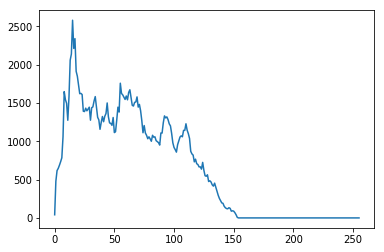

In [7]:
# 获取灰度直方图
gray_hist=cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.plot(gray_hist)

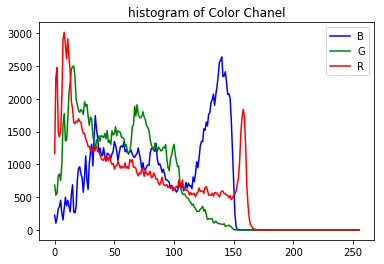

In [15]:
# 获取彩色图的各个通道直方图
hist_B=cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist_B,'b',label='B') # Blue color

hist_G=cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(hist_G,'g',label='G')  # green color

hist_R=cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(hist_R,'r',label='R')# red color
plt.title('histogram of Color Chanel')
plt.legend()

Text(0.5,1,'GrayImg after Equalization')

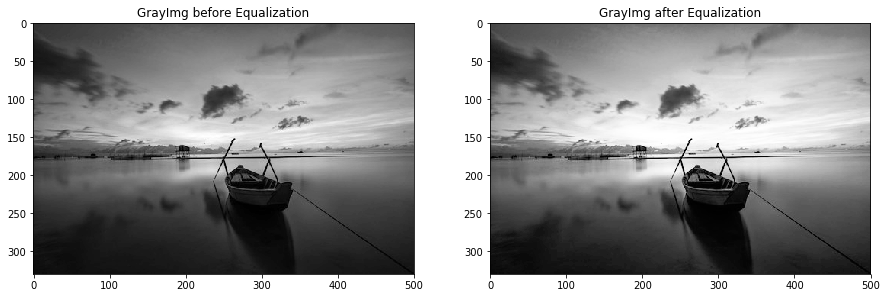

In [28]:
# 灰度图的直方图均衡化：
# 先显示均衡化前后的图像
plt.figure(12,figsize=(15,30))
plt.subplot(121)
plt.imshow(gray,cmap='gray')
plt.title('GrayImg before Equalization')

equalize = cv2.equalizeHist(gray)
plt.subplot(122)
plt.imshow(equalize,cmap='gray')
plt.title('GrayImg after Equalization')


Text(0.5,1,'Histogram comparison')

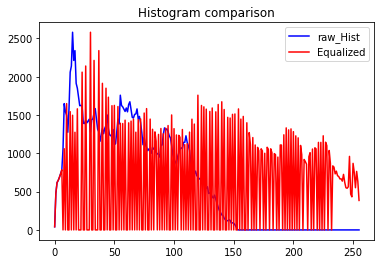

In [30]:
plt.plot(gray_hist,c='b',label='raw_Hist')

gray_equalized_hist=cv2.calcHist([equalize], [0], None, [256], [0, 256])
plt.plot(gray_equalized_hist,c='r',label='Equalized')

plt.legend()
plt.title('Histogram comparison')

In [31]:
# 彩色图的直方图均衡化
equalize = cv2.equalizeHist(img)# 这个函数不适合于彩色图的直方图均衡化

error: OpenCV(3.4.3) C:\projects\opencv-python\opencv\modules\imgproc\src\histogram.cpp:3334: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'cv::equalizeHist'


Text(0.5,1,'ColorImg after Equalization')

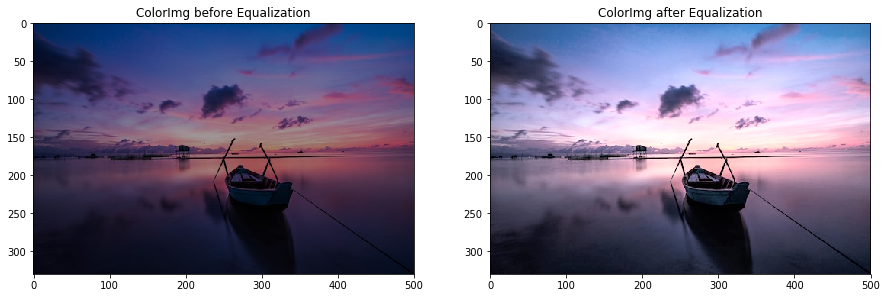

In [33]:
# 彩色直方图均衡化需要借助YUV空间
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
img_histeq = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

# 显示均衡化前后的图像
plt.figure(12,figsize=(15,30))
plt.subplot(121)
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('ColorImg before Equalization')

plt.subplot(122)
img_hist_rgb=cv2.cvtColor(img_histeq,cv2.COLOR_BGR2RGB)
plt.imshow(img_hist_rgb)
plt.title('ColorImg after Equalization')


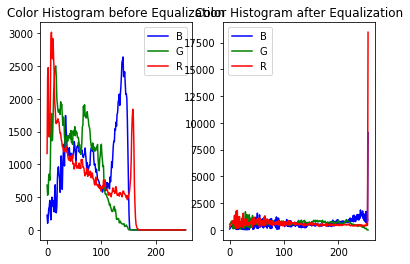

In [38]:
# 显示均衡化前后的直方图情况
plt.figure(12)

plt.subplot(121)
hist_B=cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist_B,'b',label='B') # Blue color

hist_G=cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(hist_G,'g',label='G')  # green color

hist_R=cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(hist_R,'r',label='R')# red color
plt.title('Color Histogram before Equalization')
plt.legend()

plt.subplot(122)
hist_B=cv2.calcHist([img_histeq],[0],None,[256],[0,256])
plt.plot(hist_B,'b',label='B') # Blue color

hist_G=cv2.calcHist([img_histeq],[1],None,[256],[0,256])
plt.plot(hist_G,'g',label='G')  # green color

hist_R=cv2.calcHist([img_histeq],[2],None,[256],[0,256])
plt.plot(hist_R,'r',label='R')# red color
plt.title('Color Histogram after Equalization')
plt.legend()
